## Logistic Regression......................@suyashi


- “Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function” (Wikipedia) 
- Basically about  **likelihood occurrence of an event**
- Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.In Logistic Regression, the **Sigmoid** Function is used.

**Type of questions that a binary logistic regression can examine.**

-  How does the probability of getting lung cancer (yes vs. no) change for every additional pound a person is overweight and for  every pack of cigarettes smoked per day?

- Do body weight, calorie intake, fat intake, and age have an influence on the probability of having a heart attack (yes vs. no)?

**Overfitting**

When selecting the model for the logistic regression analysis, another important consideration is the **model fit**.  Adding independent variables to a logistic regression model will always increase the amount of variance explained in the log odds (typically expressed as **R²**).  However, adding more and more variables to the model can result in overfitting, which reduces the generalizability of the model beyond the data on which the model is fit.

- The Sum of Squares Regression (SSR) is the sum of the squared differences between the prediction for each observation and the population mean. The Total Sum of Squares (SST) is equal to SSR + SSE.


### Thus, if the output is more than 0.5, we can classify the outcome as 1 (or positive) and if it is less than 0.5, we can classify it as 0 (or negative).

### Sigmod Function
In mathematical definition way of saying the sigmoid function take any range real number and returns the output value which falls in the range of 0 to 1. Based on the convention we can expect the output value in the range of -1 to 1.

The sigmoid function produces the curve which will be in the Shape “S.” These curves used in the statistics too. With the cumulative distribution function (The output will range from 0 to 1).


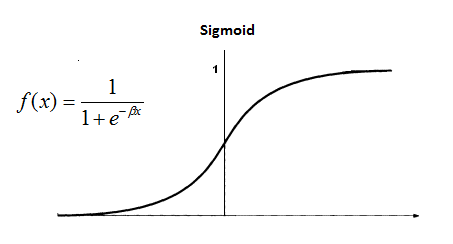


### Cost function
 - Cost function typically expressed as a difference or distance between the predicted value and the actual value. The cost function (you may also see this referred to as loss or error.) can be estimated by iteratively running the model to compare estimated predictions against “ground truth” — the known values of y.
 
 - Gradient descent is an efficient optimization algorithm that attempts to find a local or global minima of a function.(minimize cost function)
 - Cost that takes two parameters in input: hθ(x(i)) as hypothesis function and y(i) as output. You can think of it as the cost the algorithm has to pay if it makes a prediction hθ(x(i)) while the actual label was y(i).
 
 ### cost function — it helps the learner to correct / change behaviour to minimize mistakes.
 
 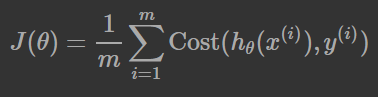


#### Example
-  Lets use logistic regression model to predict whether a student gets admitted to a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a_data=pd.read_excel("F:\ML & Data Visualization\Admission.xlsx")

In [5]:
a_data.head(5)

,Exam 1,Exam 2,Admitted
0,34.62,78.02,0
1,30.28,43.89,0
2,35.85,72.90,0
3,60.20,86.30,1
4,79.03,75.34,1


Text(0, 0.5, 'Exam 2 Score')

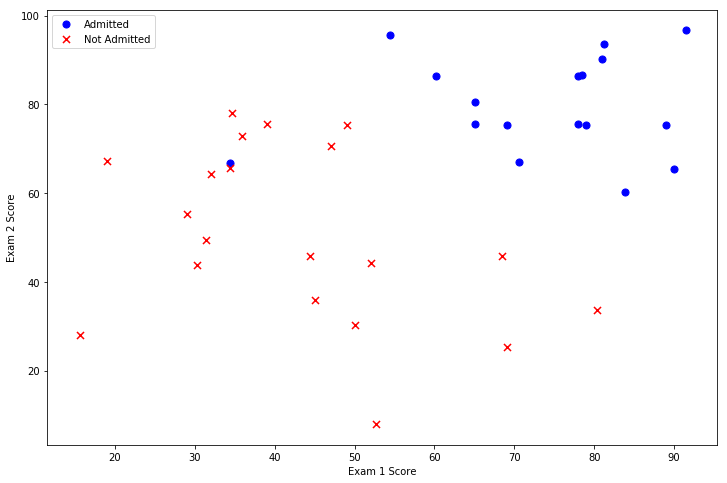

In [6]:
#scatter plot of the two scores
positive = a_data[a_data['Admitted'].isin([1])]
negative = a_data[a_data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

### Insights
It looks like there is a clear decision boundary between the two classes. Now we need to implement logistic regression so we can train a model to predict the outcome. 

In [7]:
# Sigmod Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

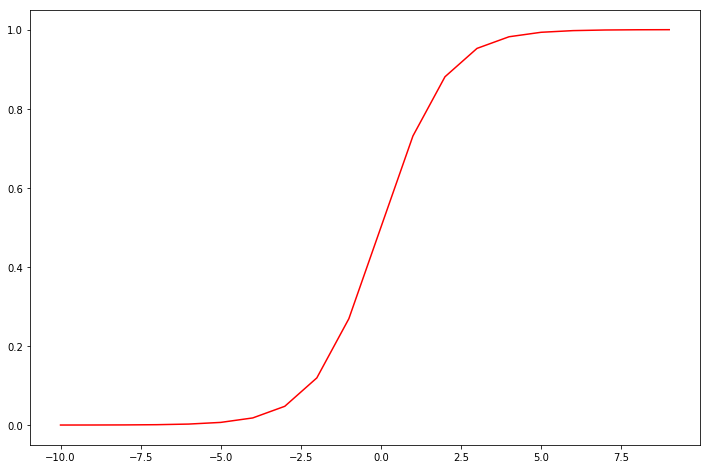

In [8]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [9]:
# cost function to evaluate a solution.

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [13]:
# add a ones column - this makes the matrix multiplication work out easier
a_data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = a_data.shape[1]
X = a_data.iloc[:,0:cols-1]
y = a_data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [14]:
X.shape, theta.shape, y.shape

((37, 3), (3,), (37, 1))

In [15]:
cost(theta, X, y)

0.6931471805599451

In [16]:
## Next we need a function to compute the gradient (parameter updates) given our training data, labels, 
# and some parameters theta.

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [17]:
gradient(theta, X, y)

array([ 0.04054054, -5.26486486, -4.55459459])

In [18]:
## use SciPy's truncated newton (TNC) implementation to find the optimal parameters.

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-18.66086135,   0.1382575 ,   0.15762428]), 54, 1)

In [19]:
# cost looks like with this solution.

cost(result[0], X, y)

0.15737136584919328

In [20]:
#we need to write a function that will output predictions 
#for a dataset X using our learned parameters theta. 
#We can then use this function to score the training accuracy of our classifier.

def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [22]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 36%


## Insights
- Our logistic regression classifer correctly predicted if a student was admitted or not 36% of the time

## The difference between binary classification and multi-classification
The name itself signifies the key differences between binary and multi-classification. Below examples will give you the clear understanding about these two kinds of classification. Let’s first look at the binary classification problem example. Later we will look at the multi-classification problems.

### Binary Classification: 
The predicting target is having only 2 possible outcomes. For email spam or not prediction, the possible 2 outcome for the target is email is spam or not spam.

On a final note, binary classification is the task of predicting the target class from two possible outcomes.
- Given the subject and the email text predicting, Email Spam or not.
- Sunny or rainy day prediction, using the weather information.
- Based on the bank customer history, Predicting whether to give the loan or not.

### Multi-Classification:
In the multi-classification problem, the idea is to use the training dataset to come up with any classification algorithm.
- Given the dimensional information of the object, Identifying the shape of the object.
- Identifying the different kinds of vehicles.
- Based on the color intensities, Predicting the color type.

### Key Difference:
In the logistic regression, the black function which takes the input features and calculates the probabilities of the possible two outcomes is the Sigmoid Function. Later the high probabilities target class is the final predicted class from the logistic regression classifier.

When it comes to the multinomial logistic regression the function is the Softmax Function. I am not going to much details about the properties of sigmoid and softmax functions and how the multinomial logistic regression algorithms work.

- Softmax: Used for the multi-classification task.
- Sigmoid: Used for the binary classification task.

### Softmax function:
Softmax function calculates the probabilities distribution of the event over ‘n’ different events.The main advantage of using Softmax is the output probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.


